# Solving the OC-SVM with SMO

In this python notebook I will try to solve a One-Class Support Vector Machine with the Sequential Minimal Optimization.

Source: [https://jonchar.net/notebooks/SVM/](https://jonchar.net/notebooks/SVM/) </br>
I will follow this source to understand the steps of training an SVM using SMO. However, ultimately I want to interchange the SVM fo a OC-SVM.

Source: [https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_wine.html#sphx-glr-auto-examples-applications-plot-outlier-detection-wine-py](https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_wine.html#sphx-glr-auto-examples-applications-plot-outlier-detection-wine-py) </br>
I will implement the OC-SVM of this source into the training algorithm described by the previous source. To do this, I might have to look at different data, or adjust the data, as I am assuming both sources will solve different problems specific to SVM or OC-SVM respectively.

## About (One-Class) Support Vector Machines:
SVMs seeks to find a decision boundary the greatest margin of separation between input classes. The SVM can allow for misclassification by regularization ("soft-margin"), useful in case the data cannot be linearly separated. Using different kernels, the decision boundary can be made numerous shapes, as the kernel maps features of the input data to higher-dimensional space.

A One-Class Support Vector Machine is an unsupervised outlier detection. It is a variant of the SVM in that it does not seek to distinguish two sets of data, but rather create a boundary around one dataset. "The One-Class SVM does not assume any parametric form of the data distribution and can therefore model the complex shape of the data much better."


From introduction Schölkopf et. al. 2001:

"The work presented here addresses an easier problem: it proposes an algorithm that computes a binary function that is supposed to capture regions in input space where the probability density lives (its support), that is, a function such that most of the data will live in the region where the functionisnonzero(Scho ̈lkopf,Williamson,Smola,Shawe-Taylor,1999).In doing so, it is in line with Vapnik’s principle never to solve a problem that is more general than the one we actually need to solve. Moreover, it is also applicable in cases where the density of the data’s distribution is not even well defined, for example, if there are singular components."

## One-Class Support Vector Machine example:

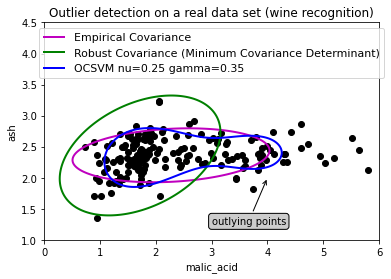

In [1]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM nu=0.25 gamma=0.35": OneClassSVM(nu=0.25, gamma=0.35),
    #"OCSVM nu=0.15 gamma=0.35": OneClassSVM(nu=0.15, gamma=0.35),
    #"OCSVM nu=0.45 gamma=0.35": OneClassSVM(nu=0.45, gamma=0.35),
    #"OCSVM nu=0.25 gamma=0.15": OneClassSVM(nu=0.25, gamma=0.15),
    #"OCSVM nu=0.25 gamma=0.55": OneClassSVM(nu=0.25, gamma=0.55),
}
colors = ["m", "g", "b", 'r', 'y', 'k', 'c']
legend1 = {}
legend2 = {}

# Get data
X1 = load_wine()["data"][:, [1, 2]]  # two clusters

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i]
    )

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1,figsize=(14,10))  # two clusters
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend(
    (
        legend1_values_list[0].collections[0],
        legend1_values_list[1].collections[0],
        legend1_values_list[2].collections[0],
    ),
    (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("ash")
plt.xlabel("malic_acid")

plt.show()

In [2]:
clf.n_features_in_

2

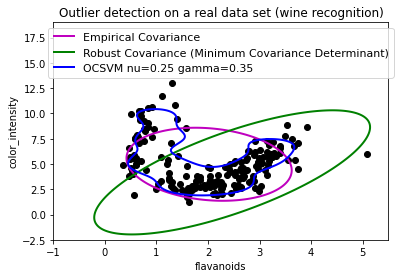

In [2]:
# Get data
X2 = load_wine()["data"][:, [6, 9]]  # "banana"-shaped

# Learn a frontier for outlier detection with several classifiers
xx2, yy2 = np.meshgrid(np.linspace(-1, 5.5, 500), np.linspace(-2.5, 19, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i]
    )

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X2[:, 0], X2[:, 1], color="black")
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend(
    (
        legend2_values_list[0].collections[0],
        legend2_values_list[1].collections[0],
        legend2_values_list[2].collections[0],
    ),
    (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("color_intensity")
plt.xlabel("flavanoids")

plt.show()

# Implementing a Support Vector Machine using Sequential Minimal Optimization and Python 3.5
sauce: [https://jonchar.net/notebooks/SVM/#Implementing-a-Support-Vector-Machine-using-Sequential-Minimal-Optimization-and-Python-3.5](https://jonchar.net/notebooks/SVM/#Implementing-a-Support-Vector-Machine-using-Sequential-Minimal-Optimization-and-Python-3.5)

Now I will recreate the results in this notebook, where the sequential minimal optimization algorithm is used to train an SVM. However, I will try to combine this with the OC-SVM from the example above in order to get the desired combination of an OC-SVM trained with the SMO alorithm as in the Unsupervised Anomaly Detection with LSTM and SVM paper by Tolga.

The example will implement SMO:
- Select two alpha values, optimize them, keep others fixed
- Afterwards a new set is picked and same thing happens
- This keeps going until convergence, determined by constraints. Heuristics are used to speed up selection process for alpha values

We obtain an alpha vector that is mostly filled with zeroes except for the alphas corresponding to the datapoints closest to the decision boundary. So the decision boundary is basically defined by these points. That makes sense because points further away should not affect how the decision boundary looks.
I think for the OC-SVM this could include a lot more datapoints, especially if data is cluttered, that are situated along the hyperspace defined by the contour of non anomalous data (could be circle, spherical, banana shaped, that sort of thing).


## Start

In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# This line is only needed if you have a HiDPI display
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

## Model

To simply store SMO parameters.

In [4]:
class SMOModel:
    """Container object for the model used for sequential minimal optimization."""
    
    def __init__(self, X, y, C, kernel, alphas, b, errors):
        self.X = X               # training data vector
        self.y = y               # class label vector
        self.C = C               # regularization parameter
        self.kernel = kernel     # kernel function
        self.alphas = alphas     # lagrange multiplier vector
        self.b = b               # scalar bias term
        self.errors = errors     # error cache
        self._obj = []           # record of objective function value
        self.m = len(self.X)     # store size of training set
        
        
        
class OCSMOModel:
    """Container object for the One Class model used for sequential minimal optimization."""
    
    def __init__(self, X, C, kernel, alphas, b, errors):
        self.X = X               # training data vector
        self.C = C               # regularization parameter
        self.kernel = kernel     # kernel function
        self.alphas = alphas     # lagrange multiplier vector
        self.b = b               # scalar bias term
        self.errors = errors     # error cache
        self._obj = []           # record of objective function value
        self.m = len(self.X)     # store size of training set

## Kernels
For this example, only Linear and Gaussian kernels are used. In our own project we will simply use the h_i output of the LSTM instead. 

Note that the Gaussian kernel is the Radial Basis Function (rbf), which is a more common kernel name for this function.
Note that in most cases for the SVM you can simply use the "kernel=" argument with a string: "linear", "poly", "rbf", etc. 

In [5]:
def linear_kernel(x, y, b=1):
    """Returns the linear combination of arrays `x` and `y` with
    the optional bias term `b` (set to 1 by default)."""
    
    return x @ y.T + b # Note the @ operator for matrix multiplication


def gaussian_kernel(x, y, sigma=1):
    """Returns the gaussian similarity of arrays `x` and `y` with
    kernel width parameter `sigma` (set to 1 by default)."""
    
    if np.ndim(x) == 1 and np.ndim(y) == 1:
        result = np.exp(- (np.linalg.norm(x - y, 2)) ** 2 / (2 * sigma ** 2))
    elif (np.ndim(x) > 1 and np.ndim(y) == 1) or (np.ndim(x) == 1 and np.ndim(y) > 1):
        result = np.exp(- (np.linalg.norm(x - y, 2, axis=1) ** 2) / (2 * sigma ** 2))
    elif np.ndim(x) > 1 and np.ndim(y) > 1:
        result = np.exp(- (np.linalg.norm(x[:, np.newaxis] - y[np.newaxis, :], 2, axis=2) ** 2) / (2 * sigma ** 2))
    return result


### OWN STUFF
def LSTM_kernel(x, y): # TODO check if this is the linear kernel (so if b is used and is rho)
    return x @ y.T

In [6]:
x_len, y_len = 5, 10

In [7]:
linear_kernel(np.random.rand(x_len, 1), np.random.rand(y_len, 1)).shape == (x_len,y_len)

True

In [8]:
gaussian_kernel(np.random.rand(x_len, 1), np.random.rand(y_len, 1)).shape == (5,10)

True

## Objective and decision function

As in the problem description. In the example this is just for the SVM!!

In [9]:
# Objective function to optimize

def objective_function(alphas, target, kernel, X_train):
    """Returns the SVM objective function based in the input model defined by:
    `alphas`: vector of Lagrange multipliers
    `target`: vector of class labels (-1 or 1) for training data
    `kernel`: kernel function
    `X_train`: training data for model."""
    
    return np.sum(alphas) - 0.5 * np.sum((target[:, None] * target[None, :]) 
                                         * kernel(X_train, X_train) * (alphas[:, None] * alphas[None, :]))


# Decision function

def decision_function(alphas, target, kernel, X_train, x_test, b):
    """Applies the SVM decision function to the input feature vectors in `x_test`."""
    
    result = (alphas * target) @ kernel(X_train, x_test) - b
    return result


### OWN STUFF
# Now for One-Class
def OC_objective_function(alphas, kernel, X_train):
    return -0.5 * sum( (alphas[:, None] * alphas[None, :]) * kernel(X_train, X_train) ) # as in eq(22)

def OC_decision_function(alphas, kernel, X_j, X_i, rho):
    """TODO Check if the implementation is correct! the sum should go over all h_j for datasample x_i"""
    return np.sign(sum(alphas * kernel(X_j, X_i) ) - rho) # scoring function, as in (19)

## Function to plot decision boundary

In [10]:
def plot_decision_boundary(model, ax, resolution=100, colors=('b', 'k', 'r'), levels=(-1, 0, 1)):
        """Plots the model's decision boundary on the input axes object.
        Range of decision boundary grid is determined by the training data.
        Returns decision boundary grid and axes object (`grid`, `ax`)."""
        
        # Generate coordinate grid of shape [resolution x resolution]
        # and evaluate the model over the entire space
        xrange = np.linspace(model.X[:,0].min(), model.X[:,0].max(), resolution)
        yrange = np.linspace(model.X[:,1].min(), model.X[:,1].max(), resolution)
        grid = [[decision_function(model.alphas, model.y,
                                   model.kernel, model.X,
                                   np.array([xr, yr]), model.b) for xr in xrange] for yr in yrange]
        grid = np.array(grid).reshape(len(xrange), len(yrange))
        
        # Plot decision contours using grid and
        # make a scatter plot of training data
        ax.contour(xrange, yrange, grid, levels=levels, linewidths=(1, 1, 1),
                   linestyles=('--', '-', '--'), colors=colors)
        ax.scatter(model.X[:,0], model.X[:,1],
                   c=model.y, cmap=plt.cm.viridis, lw=0, alpha=0.25)
        
        # Plot support vectors (non-zero alphas)
        # as circled points (linewidth > 0)
        mask = np.round(model.alphas, decimals=2) != 0.0
        ax.scatter(model.X[mask,0], model.X[mask,1],
                   c=model.y[mask], cmap=plt.cm.viridis, lw=1, edgecolors='k')
        
        return grid, ax

## The SMO algorithm

As taken from the source of jonchar.net, which is an adaptation of the paper by Platt.
Three functions: take_step(), examine_example() and train() are used in chesion to do the training process.

The steps of the process are:
- The train() function is first implemented. The heuristic choice will be made to obtain an alpha. This will be passed on to examine_example()
- examine_example() will choose the second alpha, again using the heuristic approach. Both alphas will be passed onto the take_step() function.
- In the take_step() function the calculations are carried out. Afterwards, new alphas and a new threshold b (could be rho) is obtained and the error cache (only important for SVM?) is updated.

Tolga mentioned: " Btw, you can directly compute the dual parameters via the scikit learn implementation of SVM."
I have the feeling that scikit learn uses the SMO intrinsicly to find these parameters. However, I have not been able to find a clear answer on that. If this is the case, part of the SMO algorithm could probably be skipped.

In this sense the train() should be adapted and maybe take_step() and examine_example() will not have to be implemented anymore. Also, in train(), the while loop as in Tolga's article is going over the kernel of alpha_k+1 - kernel of alpha_k .

In [11]:
def take_step(i1, i2, model):
    
    # Skip if chosen alphas are the same
    if i1 == i2:
        return 0, model
    
    alph1 = model.alphas[i1]
    alph2 = model.alphas[i2]
    y1 = model.y[i1]
    y2 = model.y[i2]
    E1 = model.errors[i1]
    E2 = model.errors[i2]
    s = y1 * y2
    
    # Compute L & H, the bounds on new possible alpha values
    if (y1 != y2):
        L = max(0, alph2 - alph1)
        H = min(model.C, model.C + alph2 - alph1)
    elif (y1 == y2):
        L = max(0, alph1 + alph2 - model.C)
        H = min(model.C, alph1 + alph2)
    if (L == H):
        return 0, model

    # Compute kernel & 2nd derivative eta
    k11 = model.kernel(model.X[i1], model.X[i1])
    k12 = model.kernel(model.X[i1], model.X[i2])
    k22 = model.kernel(model.X[i2], model.X[i2])
    eta = 2 * k12 - k11 - k22
    
    # Compute new alpha 2 (a2) if eta is negative
    if (eta < 0):
        a2 = alph2 - y2 * (E1 - E2) / eta
        # Clip a2 based on bounds L & H
        if L < a2 < H:
            a2 = a2
        elif (a2 <= L):
            a2 = L
        elif (a2 >= H):
            a2 = H
            
    # If eta is non-negative, move new a2 to bound with greater objective function value
    else:
        alphas_adj = model.alphas.copy()
        alphas_adj[i2] = L
        # objective function output with a2 = L
        Lobj = objective_function(alphas_adj, model.y, model.kernel, model.X) 
        alphas_adj[i2] = H
        # objective function output with a2 = H
        Hobj = objective_function(alphas_adj, model.y, model.kernel, model.X)
        if Lobj > (Hobj + eps):
            a2 = L
        elif Lobj < (Hobj - eps):
            a2 = H
        else:
            a2 = alph2
            
    # Push a2 to 0 or C if very close
    if a2 < 1e-8:
        a2 = 0.0
    elif a2 > (model.C - 1e-8):
        a2 = model.C
    
    # If examples can't be optimized within epsilon (eps), skip this pair
    if (np.abs(a2 - alph2) < eps * (a2 + alph2 + eps)):
        return 0, model
    
    # Calculate new alpha 1 (a1)
    a1 = alph1 + s * (alph2 - a2)
    
    # Update threshold b to reflect newly calculated alphas
    # Calculate both possible thresholds
    b1 = E1 + y1 * (a1 - alph1) * k11 + y2 * (a2 - alph2) * k12 + model.b
    b2 = E2 + y1 * (a1 - alph1) * k12 + y2 * (a2 - alph2) * k22 + model.b
    
    # Set new threshold based on if a1 or a2 is bound by L and/or H
    if 0 < a1 and a1 < C:
        b_new = b1
    elif 0 < a2 and a2 < C:
        b_new = b2
    # Average thresholds if both are bound
    else:
        b_new = (b1 + b2) * 0.5

    # Update model object with new alphas & threshold
    model.alphas[i1] = a1
    model.alphas[i2] = a2
    
    # Update error cache
    # Error cache for optimized alphas is set to 0 if they're unbound
    for index, alph in zip([i1, i2], [a1, a2]):
        if 0.0 < alph < model.C:
            model.errors[index] = 0.0
    
    # Set non-optimized errors based on equation 12.11 in Platt's book
    non_opt = [n for n in range(model.m) if (n != i1 and n != i2)]
    model.errors[non_opt] = model.errors[non_opt] + \
                            y1*(a1 - alph1)*model.kernel(model.X[i1], model.X[non_opt]) + \
                            y2*(a2 - alph2)*model.kernel(model.X[i2], model.X[non_opt]) + model.b - b_new
    
    # Update model threshold
    model.b = b_new
    
    return 1, model

In [12]:
def examine_example(i2, model):
    
    y2 = model.y[i2]
    alph2 = model.alphas[i2]
    E2 = model.errors[i2]
    r2 = E2 * y2

    # Proceed if error is within specified tolerance (tol)
    if ((r2 < -tol and alph2 < model.C) or (r2 > tol and alph2 > 0)):
        
        if len(model.alphas[(model.alphas != 0) & (model.alphas != model.C)]) > 1:
            # Use 2nd choice heuristic is choose max difference in error
            if model.errors[i2] > 0:
                i1 = np.argmin(model.errors)
            elif model.errors[i2] <= 0:
                i1 = np.argmax(model.errors)
            step_result, model = take_step(i1, i2, model)
            if step_result:
                return 1, model
            
        # Loop through non-zero and non-C alphas, starting at a random point
        for i1 in np.roll(np.where((model.alphas != 0) & (model.alphas != model.C))[0],
                          np.random.choice(np.arange(model.m))):
            step_result, model = take_step(i1, i2, model)
            if step_result:
                return 1, model
        
        # loop through all alphas, starting at a random point
        for i1 in np.roll(np.arange(model.m), np.random.choice(np.arange(model.m))):
            step_result, model = take_step(i1, i2, model)
            if step_result:
                return 1, model
    
    return 0, model

In [13]:
def train(model):
    
    numChanged = 0
    examineAll = 1

    while(numChanged > 0) or (examineAll):
        numChanged = 0
        if examineAll:
            # loop over all training examples
            for i in range(model.alphas.shape[0]):
                examine_result, model = examine_example(i, model)
                numChanged += examine_result
                if examine_result:
                    obj_result = objective_function(model.alphas, model.y, model.kernel, model.X)
                    model._obj.append(obj_result)
        else:
            # loop over examples where alphas are not already at their limits
            for i in np.where((model.alphas != 0) & (model.alphas != model.C))[0]:
                examine_result, model = examine_example(i, model)
                numChanged += examine_result
                if examine_result:
                    obj_result = objective_function(model.alphas, model.y, model.kernel, model.X)
                    model._obj.append(obj_result)
        if examineAll == 1:
            examineAll = 0
        elif numChanged == 0:
            examineAll = 1
        
    return model

## Using the linear kernel

Use the make blobs function to create data and labels

In [14]:
X_train, y = make_blobs(n_samples=1000, centers=2,
                        n_features=2, random_state=1)

also scale the data to be centered at the origin with 1 unit std using StandardScalar

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)

change 0 labels to -1

In [16]:
y[y == 0] = -1

Instantiate a model, use a large C value, which gives a hard margin!

In [17]:
# Set model parameters and initial values
C = 1000.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Set tolerances
tol = 0.01 # error tolerance
eps = 0.01 # alpha tolerance

# Instantiate model
model = SMOModel(X_train_scaled, y, C, linear_kernel,
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error

do the training

In [18]:
np.random.seed(0)
output = train(model)

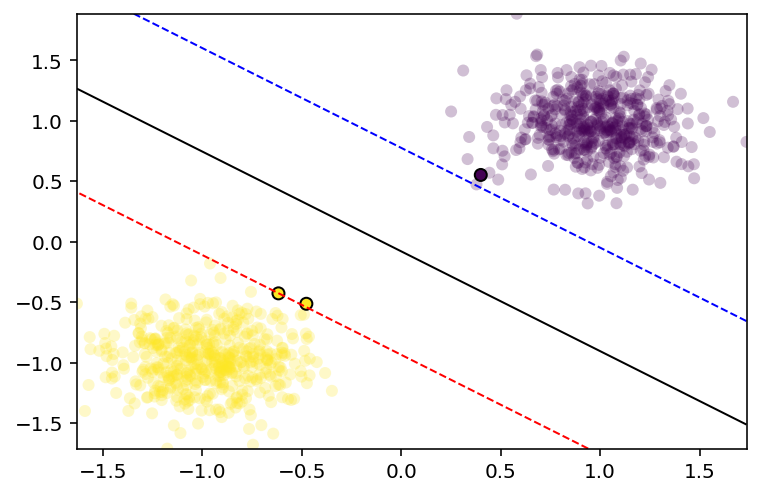

In [19]:
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(output, ax)


now add an outlier and do it again

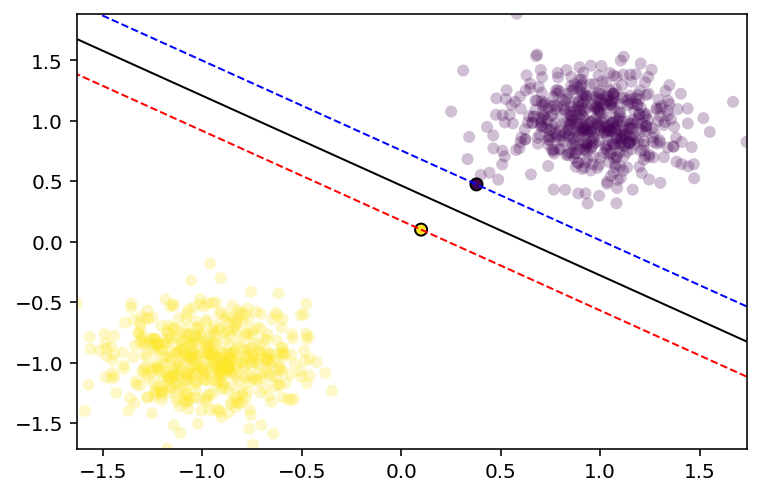

In [20]:
# Add an outlier
X_outlier = np.append(X_train_scaled, [0.1, 0.1])
X_outlier = X_outlier.reshape(X_train.shape[0]+1, X_train.shape[1])
y_outlier = np.append(y, 1)

# Set model parameters and initial values
C = 1000.0
m = len(X_outlier)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Instantiate model
model = SMOModel(X_outlier, y_outlier, C, linear_kernel,
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error

output = train(model)
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(output, ax)

## Gaussian kernel
Now try it out with the gaussian kernel.

I am going to assume that this will be somewhat similar to our dataset. We use 3 dimensions and going by previous plots I get the feeling we will have a 3D cloud of datapoints. I am assuming that quark and gluon jets have their own centers, that their datasets show significant overlap, therefore they are harder to distinguish. 

Somehow one datapoint for us should be the entire jet. Because one full jet is what we want to distinguish from another. Therefore a sample is a jet is X_i. But I think this can be implemented later... hopefully. Ultimately, we do not want the SVM to compare each splitting since we are distinguishing between different jets (quark vs gluon, quenched vs unquenched). TODO Figure out how to do this, or if this is taken into account from the getgo, going by Gijs' LSTM -> mean pooling part.

## First create new data

In [48]:
X_train, y = make_circles(n_samples=500, noise=0.2,
                          factor=0.4,
                          random_state=4)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
y[y == 0] = -1


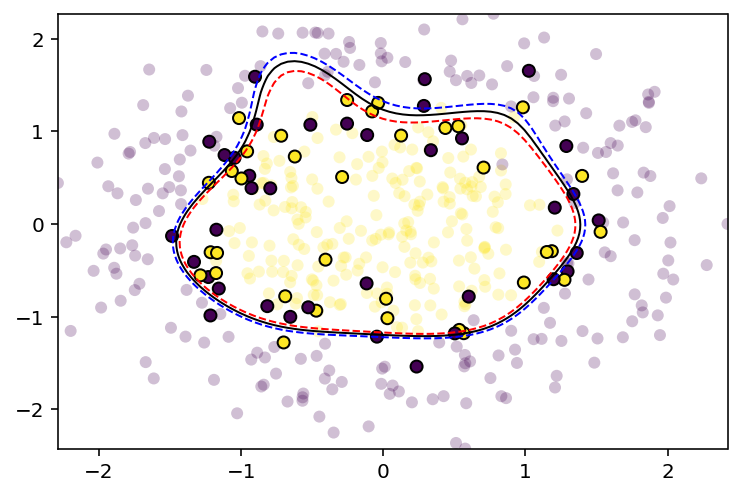

In [49]:
# Set model parameters and initial values
C = 1000.0 
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Instantiate model
model = SMOModel(X_train_scaled, y, C,  gaussian_kernel,
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error

output = train(model)
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(output, ax)

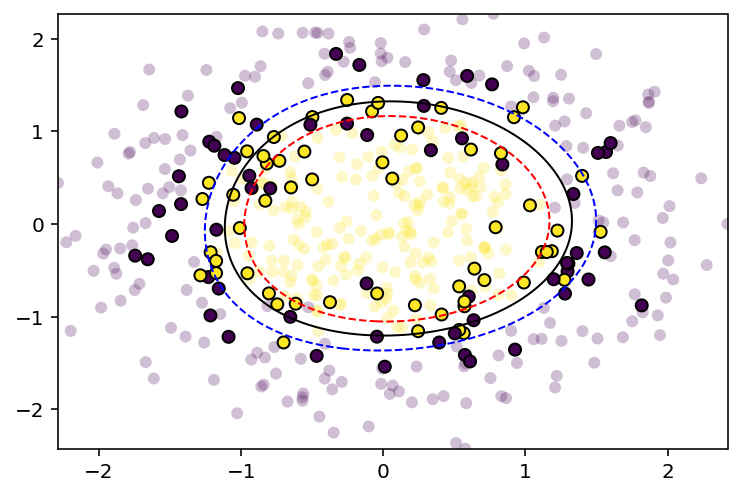

In [50]:
# Set model parameters and initial values
C = 1.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Instantiate model
model = SMOModel(X_train_scaled, y, C, gaussian_kernel,
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error

output = train(model)
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(output, ax)

In [51]:
test = gaussian_kernel(X_train_scaled, X_train_scaled)

test

array([[1.        , 0.00396562, 0.0422402 , ..., 0.13869754, 0.00481655,
        0.03133202],
       [0.00396562, 1.        , 0.71612349, ..., 0.15764432, 0.18302717,
        0.77197086],
       [0.0422402 , 0.71612349, 1.        , ..., 0.46489321, 0.24537308,
        0.95988869],
       ...,
       [0.13869754, 0.15764432, 0.46489321, ..., 1.        , 0.44058505,
        0.31857839],
       [0.00481655, 0.18302717, 0.24537308, ..., 0.44058505, 1.        ,
        0.15644035],
       [0.03133202, 0.77197086, 0.95988869, ..., 0.31857839, 0.15644035,
        1.        ]])

## Now try to do the same thing with a OneClassSVM

Here I will use the OneClassSVM from sklearn.svm, so I will most likely remove some of the functions used in the previous example.

I am still unsure as to where the SMO comes in with the sci-kit learn SVM. They keep mentioning that they use libsvm which in turn uses SMO to find the alphas that minimize the objective function.[https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). But I cannot seem to find out if this happens with the OC-SVM as well... maybe ask Tolga about this? 

"SVC

        Implementation of Support Vector Machine classifier using libsvm: the kernel can be non-linear but its SMO
        algorithm does not scale to large number of samples as LinearSVC does. Furthermore SVC multi-class mode is
        implemented using one vs one scheme while LinearSVC uses one vs the rest. It is possible to implement one vs
        the rest with SVC by using the OneVsRestClassifier wrapper. Finally SVC can fit dense data without memory copy
        if the input is C-contiguous. Sparse data will still incur memory copy though."

[https://scikit-learn-laboratory.readthedocs.io/en/master/_modules/sklearn/svm/classes.html](https://scikit-learn-laboratory.readthedocs.io/en/master/_modules/sklearn/svm/classes.html)

"SVC

        Implementation of Support Vector Machine classifier using libsvm:
        the kernel can be non-linear but its SMO algorithm does not
        scale to large number of samples as LinearSVC does.

        Furthermore SVC multi-class mode is implemented using one
        vs one scheme while LinearSVC uses one vs the rest. It is
        possible to implement one vs the rest with SVC by using the
        :class:`sklearn.multiclass.OneVsRestClassifier` wrapper.

        Finally SVC can fit dense data without memory copy if the input
        is C-contiguous. Sparse data will still incur memory copy though.

...

SVR
        
        Implementation of Support Vector Machine regression using libsvm:
        the kernel can be non-linear but its SMO algorithm does not
        scale to large number of samples as LinearSVC does.
"

Figure out the following:
- How does the regularization work for sklearn.svm.OneClassSVM
- What does the hyperparameter 'nu' do exactly? From the page: "an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1]. By default 0.5 will be taken."

## Using sklearn

In [52]:
from sklearn.svm import OneClassSVM, SVC
from numpy import quantile, where, random


def sk_train_plot(model, X1, y=None, ax=plt):
    # fit (train) and predict the data, if y
    model.fit(X1, y, sample_weight=None) # TODO figure out sample_weight
    pred = model.predict(X1)
    
    # meshgrid for plots
    xx1, yy1 = np.meshgrid(np.linspace(X1[:,0].min(), X1[:,0].max(), 500),
                        np.linspace(X1[:,1].min(), X1[:,1].max(), 500))
    
    # decision function
    Z1 = model.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    
    # plot data and decision function
    ax.scatter(X1[:, 0], X1[:, 1], c=y, cmap=plt.cm.viridis, alpha=0.25)
    ax.contour( xx1, yy1, Z1, levels=(-1,0,1), linewidths=(1, 1, 1),
                linestyles=('--', '-', '--'), colors=('b','k', 'r'))
    
    
    
    # Plot support vectors (non-zero alphas)
    # as circled points (linewidth > 0)
    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], c=y[model.support_],
                cmap=plt.cm.viridis, lw=1, edgecolors='k')
    
    return


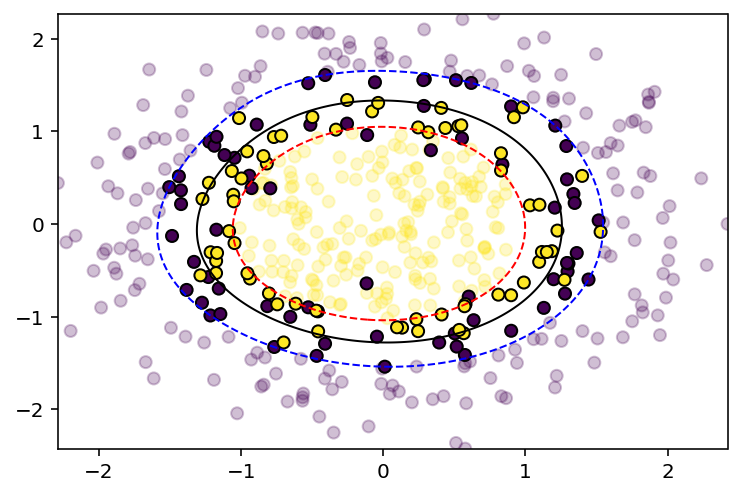

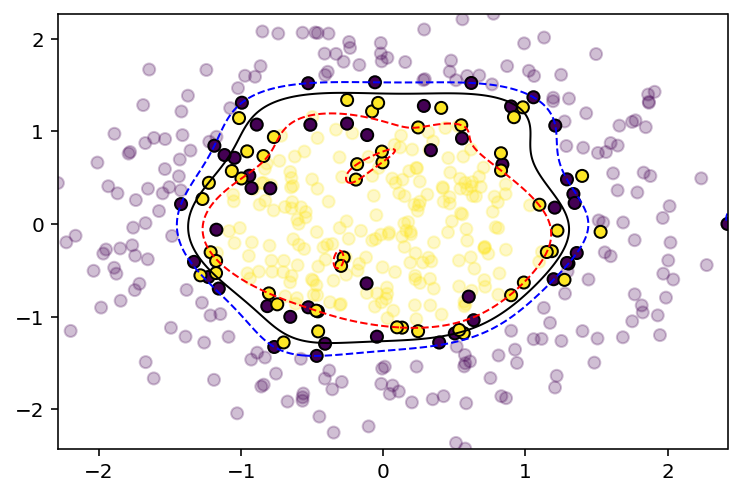

In [53]:
# test normal SVM, the SVC classifier
model = SVC(C=1,  kernel='rbf')
sk_train_plot(model, X_train_scaled, y)
plt.show()

model = SVC(C=1000,  kernel='rbf')
sk_train_plot(model, X_train_scaled, y)

In [27]:
x_test = np.array([[-2,-2], [0,0]])
model.predict(x_test)

array([-1,  1])

## Test non anomalous data


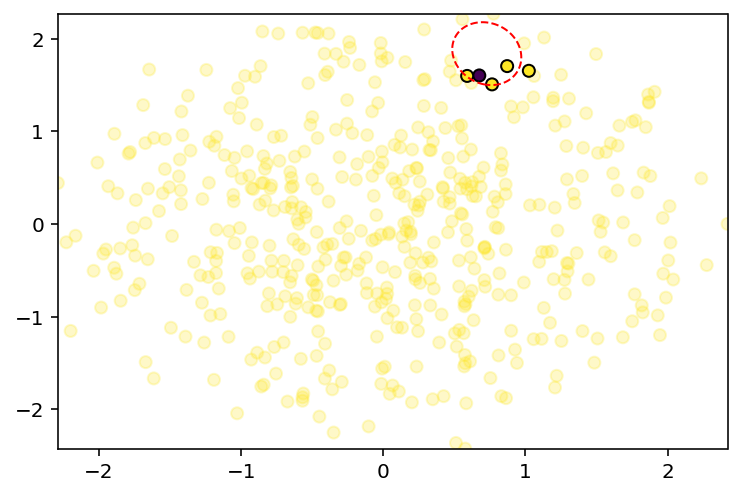

In [28]:
y_nn = np.ones(len(y))
y_nn[0] = -1

model = SVC(C=1,  kernel='rbf')
sk_train_plot(model, X_train_scaled, y_nn)

## Be careful of colour scheme, it is not always +1 purple, -1 yellow!

# Now test on OneClassSVM

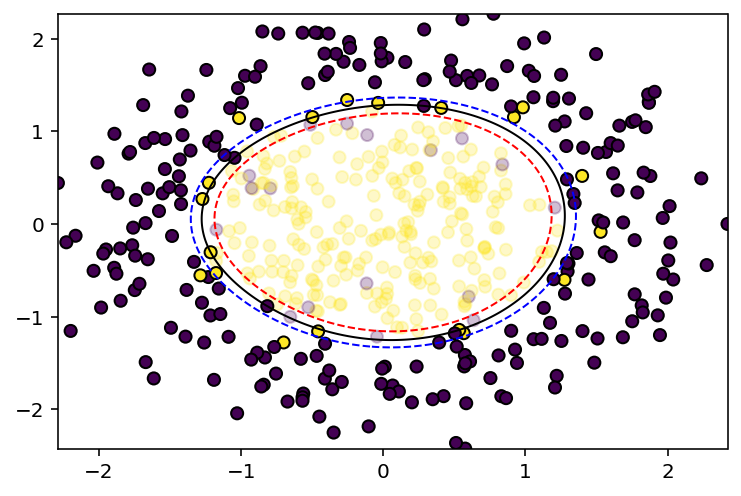

In [55]:
# test a oneclass SVM

model = OneClassSVM(nu=0.5, gamma=0.35, kernel='rbf')
sk_train_plot(model, X_train_scaled, y)

In [30]:
x_test = np.array([[-2,-2], [-1,-1],[0,0]])
model.predict(x_test)

array([-1, -1,  1])

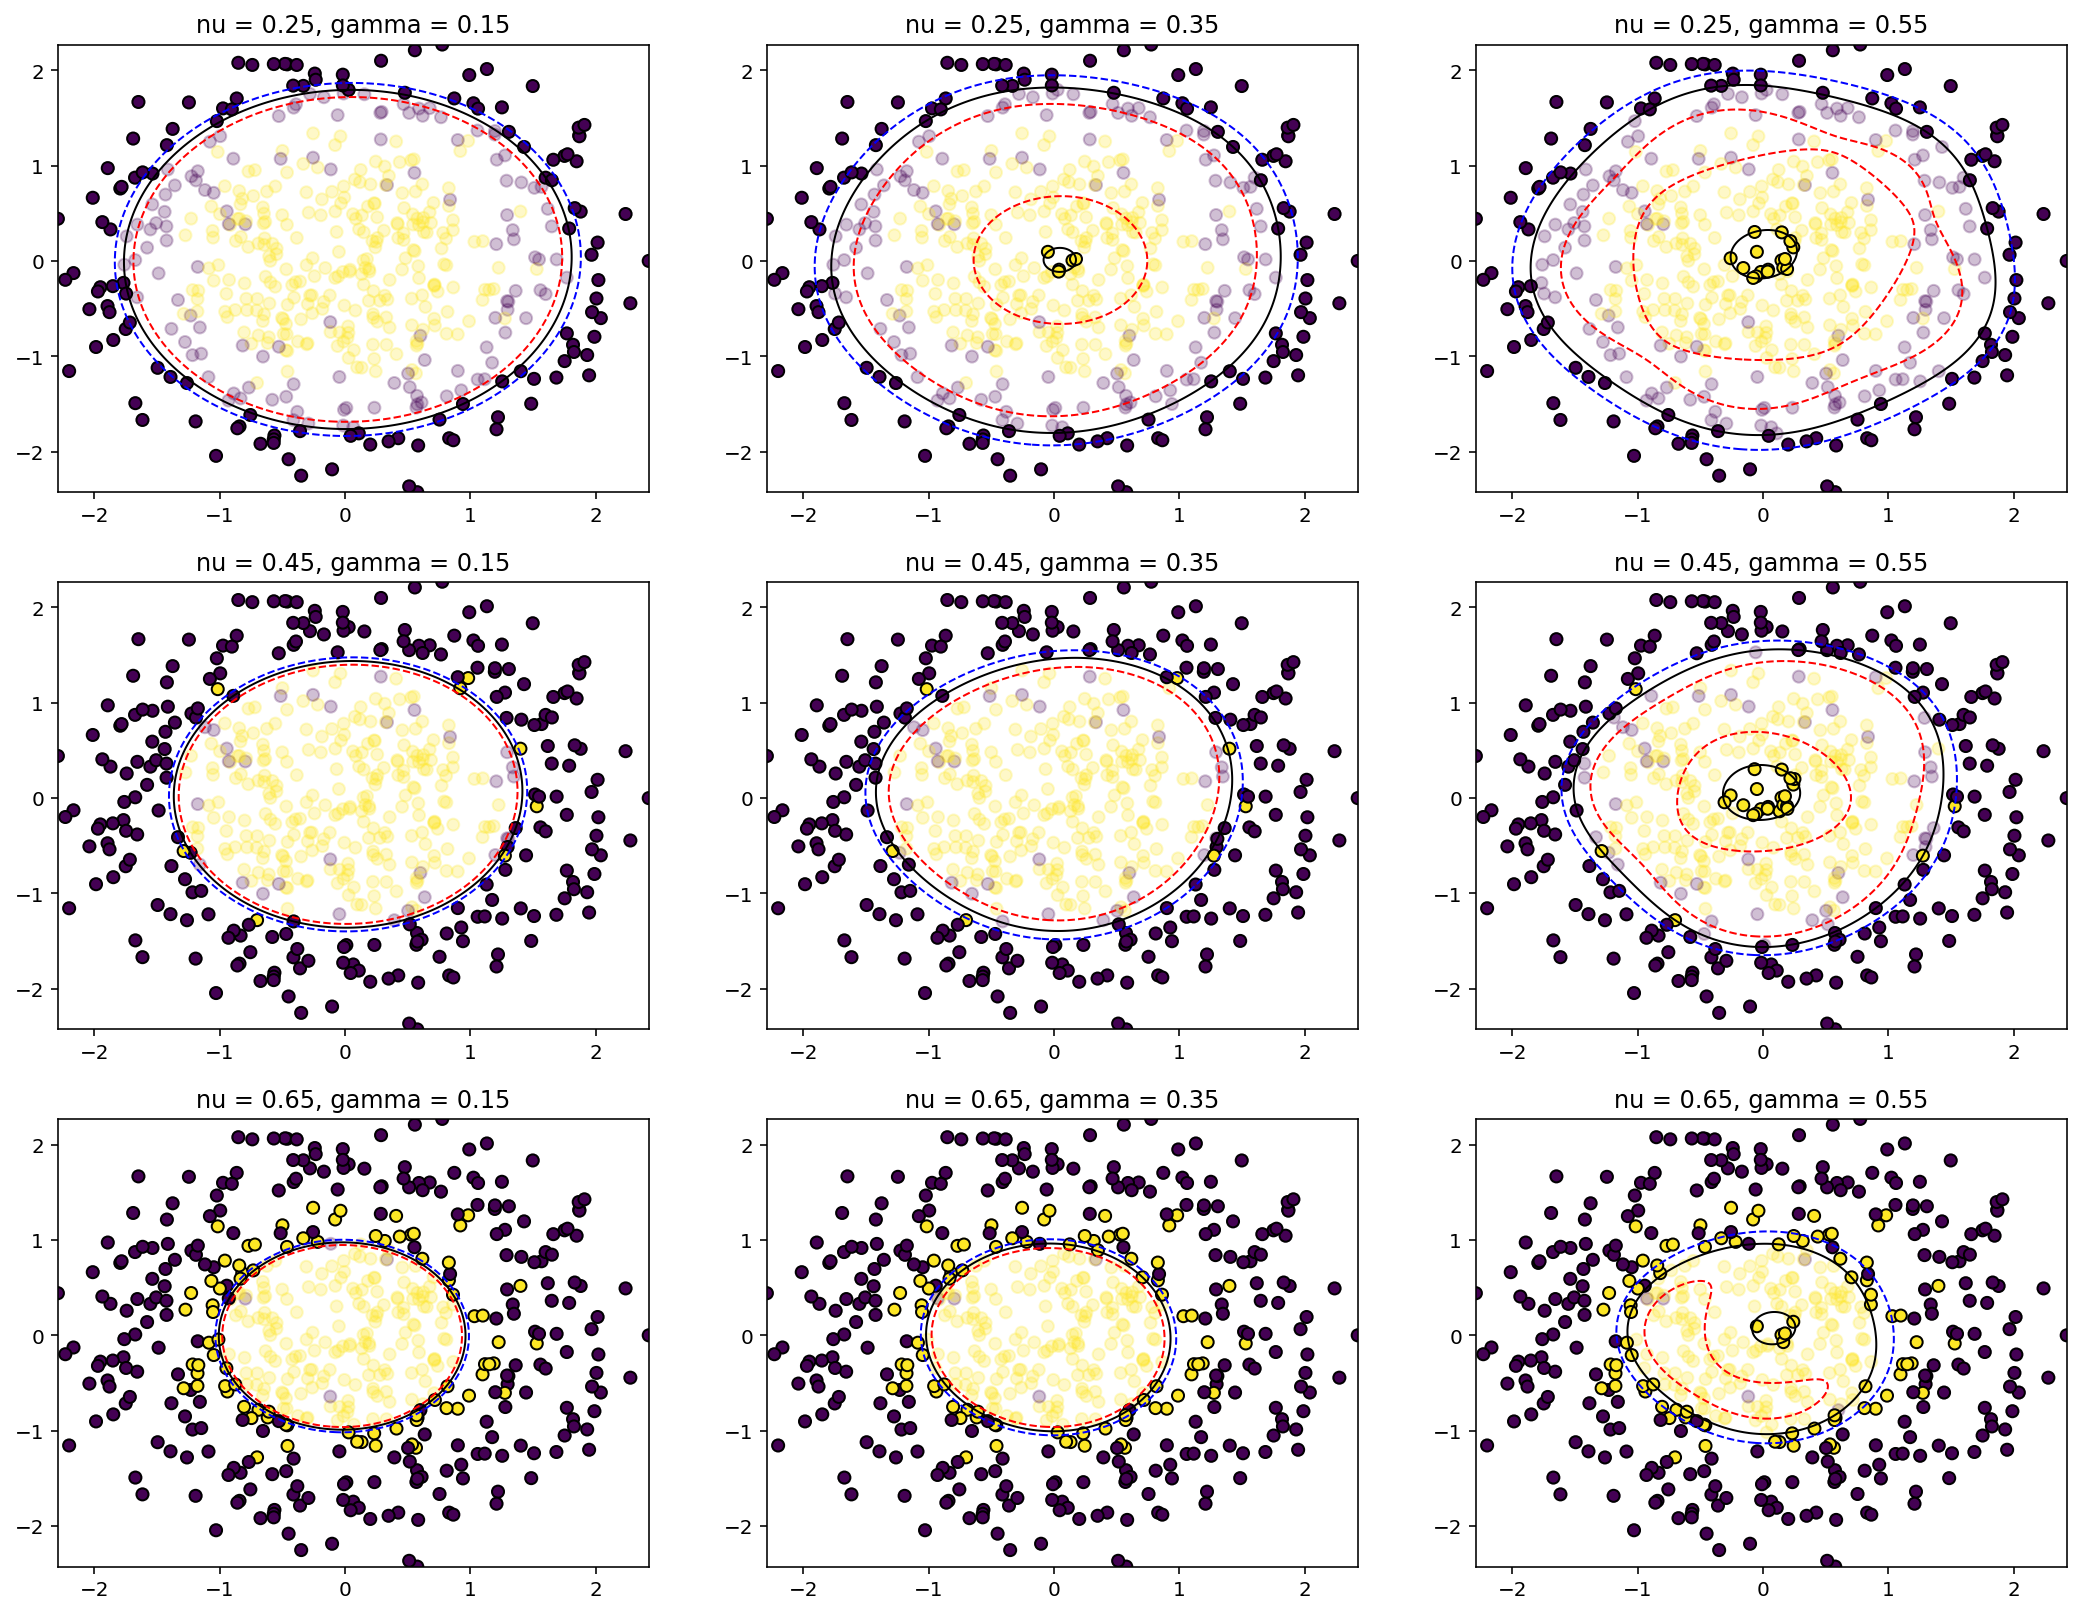

In [31]:
# test one class SVM
nu_list = [0.25, 0.45, 0.65]
gamma_list = [0.15, 0.35, 0.55]

fig, ax = plt.subplots(3, 3, figsize=(18,14))

for i, nu in enumerate(nu_list):
    for j, gamma in enumerate(gamma_list):
        model = OneClassSVM(nu=nu, gamma=gamma, kernel='rbf')
        sk_train_plot(model, X_train_scaled, y, ax=ax[i, j])
        ax[i, j].set_title("nu = {}, gamma = {}".format(nu, gamma))


## See if more data fixes the doughnuts

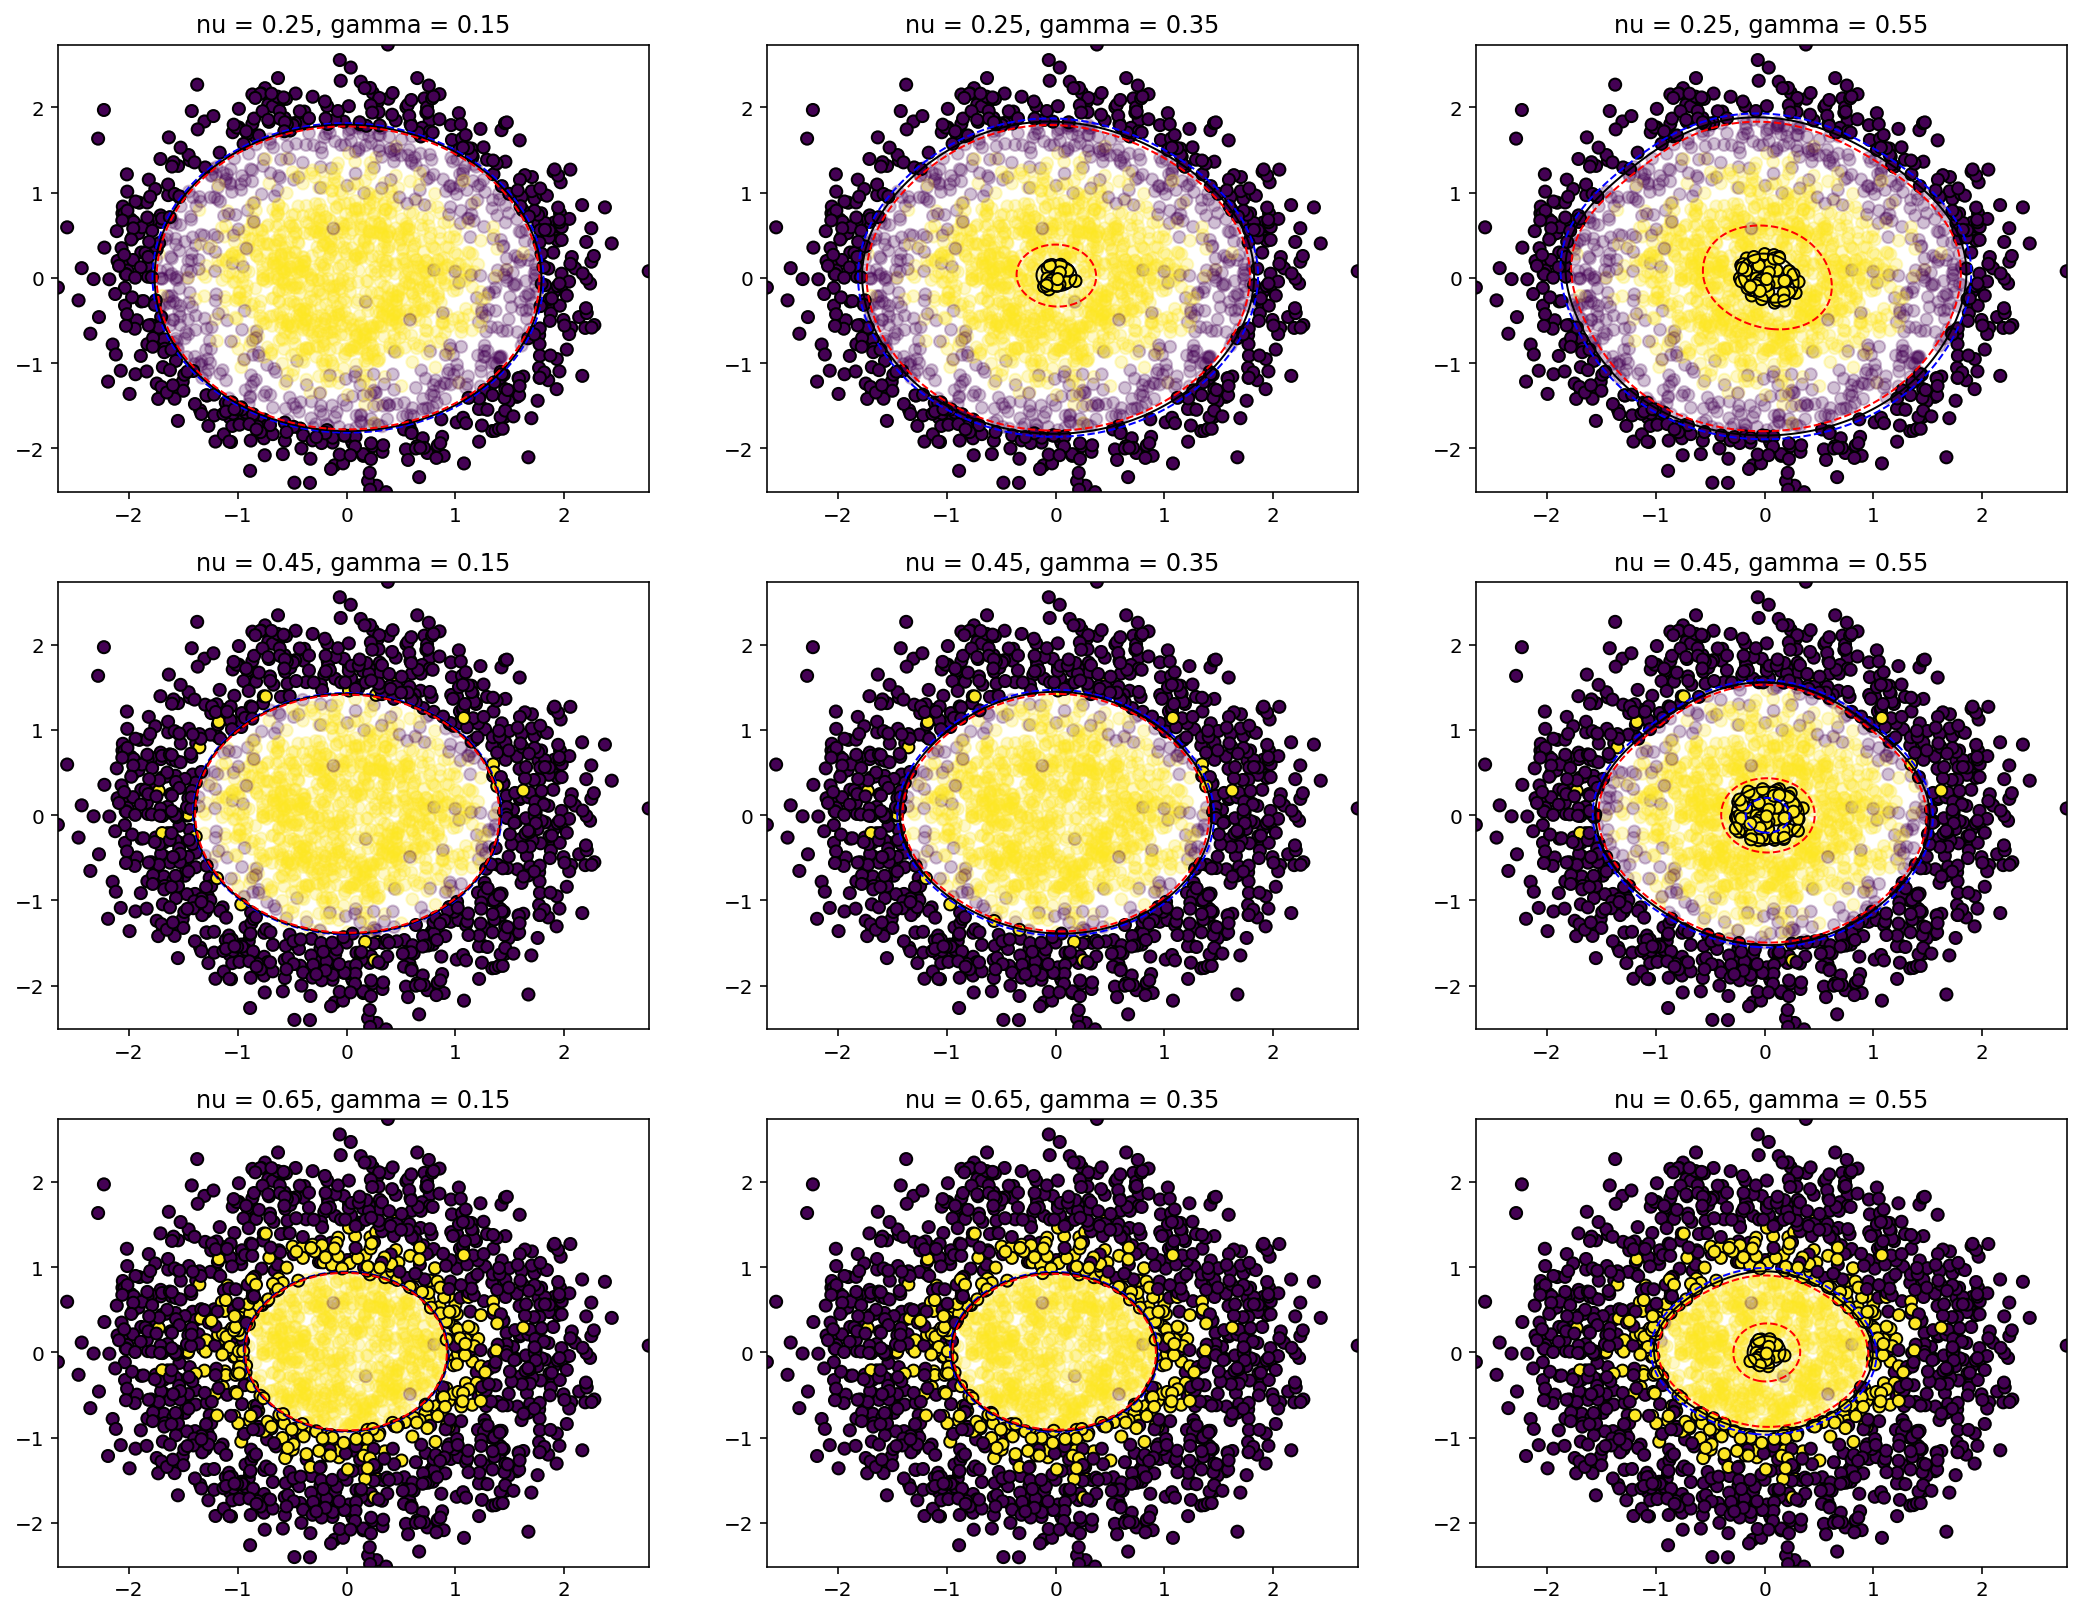

In [32]:
X_train2, y2 = make_circles(n_samples=2000, noise=0.2,
                          factor=0.4,
                          random_state=4)
scaler2 = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2, y2)
y2[y2 == 0] = -1

# test one class SVM
nu_list = [0.25, 0.45, 0.65]
gamma_list = [0.15, 0.35, 0.55]

fig, ax = plt.subplots(3, 3, figsize=(18,14))

for i, nu in enumerate(nu_list):
    for j, gamma in enumerate(gamma_list):
        model = OneClassSVM(nu=nu, gamma=gamma, kernel='rbf')
        sk_train_plot(model, X_train_scaled2, y2, ax=ax[i, j])
        ax[i, j].set_title("nu = {}, gamma = {}".format(nu, gamma))

check this 
[https://towardsdatascience.com/support-vector-machines-dual-formulation-quadratic-programming-sequential-minimal-optimization-57f4387ce4dd](https://towardsdatascience.com/support-vector-machines-dual-formulation-quadratic-programming-sequential-minimal-optimization-57f4387ce4dd)

The params of the OneCassSVM:
- coef0: "Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’."
- degree is only for poly
- tol is epsilon
- nu: "An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1]. By default 0.5 will be taken." this explanation is not very intuitive, nu is basically the same sort of regularization as C for the SVC, they are approximately related by C = 1 / ( nu * l ). So the actual regularization also depends on the number of datasamples (which is l here).

Note: gamma is simply a parameter for the Gaussian kernel and will be of no use to us when we apply LSTM as kernel. However, we have to keep in mind that the same sort of results as above might show up! There could be a doughnut shape in our regular vs anomaly group.


In [33]:
model.get_params([])

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 0.55,
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.65,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [34]:
model.dual_coef_

array([[1., 1., 1., ..., 1., 1., 1.]])

In [35]:
model.offset_

array([352.10906305])

## Test Alphas

In [ ]:
model = OneClassSVM(nu=0.5, gamma=0.35, kernel='rbf')
sk_train_plot(model, X_train_scaled, y)

252 252
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         0.57191187
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.66455333 1.         1.
  1.         1.         1.         1.         1.         0.63931113
  1.         1. 

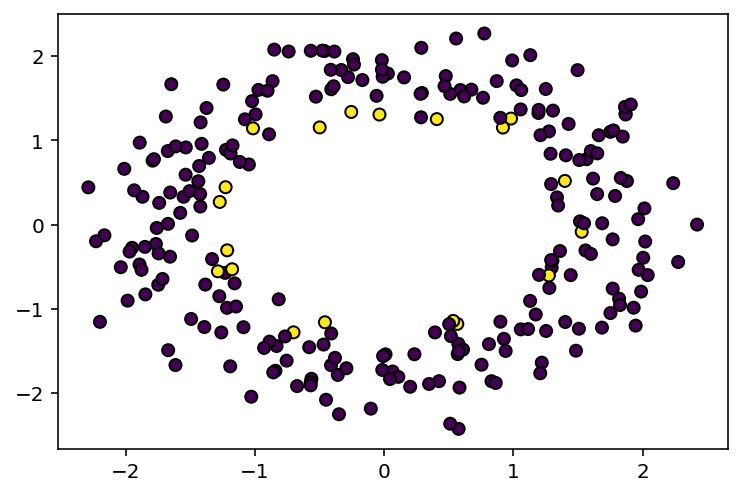

In [56]:
alphas = np.abs(model.dual_coef_)
a_idx = model.support_
print(len(alphas[0]), len(a_idx))

print(alphas, a_idx)

plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], c=y[model.support_],
                cmap=plt.cm.viridis, lw=1, edgecolors='k')

# TODO

## Map everything to linear feature space

ValueError: 'c' argument has 500 elements, which is inconsistent with 'x' and 'y' with size 178.

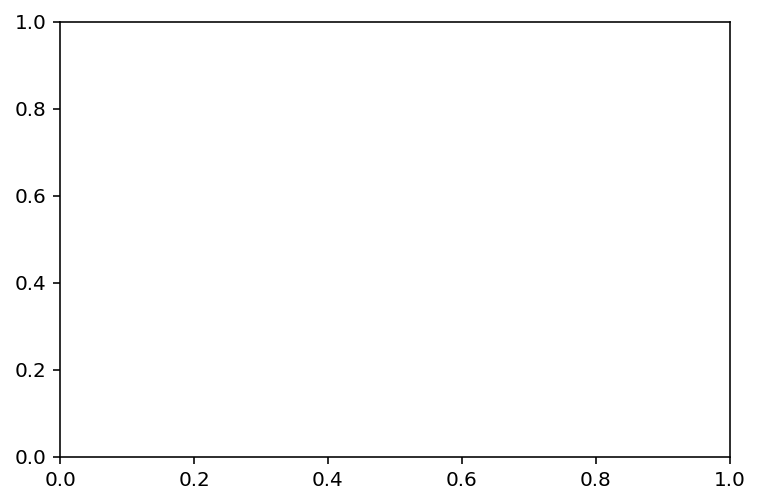

In [36]:
model = OneClassSVM(nu=0.5, gamma=0.35, kernel='rbf')

# fit (train) and predict the data, if y
model.fit(X1, y, sample_weight=None) # TODO figure out sample_weight
pred = model.predict(X1)

# meshgrid for plots
xx1, yy1 = np.meshgrid(np.linspace(X1[:,0].min(), X1[:,0].max(), 500),
                    np.linspace(X1[:,1].min(), X1[:,1].max(), 500))

# decision function
Z1 = model.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)


# remap to linear space


# plot data and decision function
plt.scatter(X1[:, 0], X1[:, 1], c=y, cmap=plt.cm.viridis, alpha=0.25)
plt.contour( xx1, yy1, Z1, levels=(-1,0,1), linewidths=(1, 1, 1),
            linestyles=('--', '-', '--'), colors=('b','k', 'r'))



# Plot support vectors (non-zero alphas)
# as circled points (linewidth > 0)
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], c=y[model.support_],
            cmap=plt.cm.viridis, lw=1, edgecolors='k')


# Doing similar things with LIBsVM

LIBSVM has an SMO built in (Note: this is what was said on the stackoverflow page, however doing some research nothing comes up with libsvm and SMO. Additionally, I have installed libsvm through Conda, yet it seems like python cannot find the module whatsoever when trying to import...). We want to combine this with the One-Class SVM of the scikit learn module to obtain an efficient method of model training.

source: https://stackoverflow.com/questions/14588967/one-class-svm-libsvm/14787678

example code:

In [ ]:
label=ones(Number Of your training instances,1); % You should generate labels for your only class!
model = svmtrain( label, Training Data , '-s 2 -t 2  -n 0.5' ) ; % You can change the parameters
[predicted_label,accuracy]=svmpredict(TestLabels,Test Set, model);

SyntaxError: invalid syntax (4126129274.py, line 1)

# Stackoverflow example
source: [https://stackoverflow.com/questions/4214868/an-example-using-python-bindings-for-svm-library-libsvm](https://stackoverflow.com/questions/4214868/an-example-using-python-bindings-for-svm-library-libsvm)

In [ ]:
import numpy as np
#help("modules")
from libsvm import *


Please wait a moment while I gather a list of all available modules...



/Users/wesselrijk/.conda/envs/root_env/lib/python3.9/site-packages/IPython/kernel/__init__.py:12: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated since IPython 4.0."


Welcome to JupyROOT 6.24/06


/Users/wesselrijk/.conda/envs/root_env/lib/python3.9/site-packages/ROOT/_facade.py:150: MatplotlibDeprecationWarning: 
The matplotlib.compat module was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  return _orig_ihook(name, *args, **kwds)
NOTE: Redirects are currently not supported in Windows or MacOs.
/Users/wesselrijk/.conda/envs/root_env/lib/python3.9/pkgutil.py:108: VisibleDeprecationWarning: zmq.eventloop.minitornado is deprecated in pyzmq 14.0 and will be removed.
    Install tornado itself to use zmq with the tornado IOLoop.
    
  yield from walk_packages(path, info.name+'.', onerror)


DistRDF             atexit              jedi                reprlib
IPython             attr                jinja2              resource
JsMVA               audioop             joblib              rlcompleter
JupyROOT            autopep8            json                rmagic
PIL                 autoreload          jsonschema          runJediLanguageServer
ROOT                awkward             jupyter             runpy
XRootD              awkward0            jupyter_client      sched
__future__          backcall            jupyter_core        scipy
_abc                backports           jupyterlab_pygments secrets
_aix_support        base64              keyword             select
_ast                bdb                 kiwisolver          selectors
_asyncio            binascii            lib2to3             send2trash
_bisect             binhex              libJupyROOT3_9      setuptools
_black_version      bisect              libROOTPythonizations3_9 shell_exec
_blake2             b

ModuleNotFoundError: No module named 'libsvm'